# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [178]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [181]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls
import requests
from io import BytesIO
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
# Set headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0"
}


# Send request and load into memory
response = requests.get(url_LondonHousePrices, headers=headers)
excel_data = BytesIO(response.content)

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(excel_data, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [185]:
print(properties.head())

  Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [188]:
properties=properties.transpose()
properties= properties.reset_index()
properties.columns=properties.iloc[0]
print(properties.head())


0          Unnamed: 0        NaT  1995-01-01 00:00:00  1995-02-01 00:00:00  \
0          Unnamed: 0        NaT  1995-01-01 00:00:00  1995-02-01 00:00:00   
1      City of London  E09000001                90347                81213   
2  Barking & Dagenham  E09000002                51870                52513   
3              Barnet  E09000003                98948                98848   
4              Bexley  E09000004                64956                64786   

0  1995-03-01 00:00:00  1995-04-01 00:00:00  1995-05-01 00:00:00  \
0  1995-03-01 00:00:00  1995-04-01 00:00:00  1995-05-01 00:00:00   
1                78168                76172                83392   
2                52701                54618                54524   
3                97848                96273                95737   
4                64366                64276                63995   

0  1995-06-01 00:00:00  1995-07-01 00:00:00  1995-08-01 00:00:00  ...  \
0  1995-06-01 00:00:00  1995-07-01 00:00:00  1995

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [191]:
properties.rename(columns={"Unnamed: 0": "Borough"},inplace=True)
properties.rename(columns={pd.NaT: 'ONC Code'}, inplace=True)
properties = properties[1:]
print(properties.head())

0             Borough   ONC Code 1995-01-01 00:00:00 1995-02-01 00:00:00  \
1      City of London  E09000001               90347               81213   
2  Barking & Dagenham  E09000002               51870               52513   
3              Barnet  E09000003               98948               98848   
4              Bexley  E09000004               64956               64786   
5               Brent  E09000005               76880               77651   

0 1995-03-01 00:00:00 1995-04-01 00:00:00 1995-05-01 00:00:00  \
1               78168               76172               83392   
2               52701               54618               54524   
3               97848               96273               95737   
4               64366               64276               63995   
5               77644               78668               79464   

0 1995-06-01 00:00:00 1995-07-01 00:00:00 1995-08-01 00:00:00  ...  \
1               93757              108801              110976  ...   
2           

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [194]:
properties_melted = properties.melt(id_vars=['Borough','ONC Code'], var_name='date', value_name='Average Price')
properties_melted.tail(20)

,Borough,ONC Code,date,Average Price
17308,Sutton,E09000029,2025-01-01 00:00:00,447429
17309,Tower Hamlets,E09000030,2025-01-01 00:00:00,502844
17310,Waltham Forest,E09000031,2025-01-01 00:00:00,522549
17311,Wandsworth,E09000032,2025-01-01 00:00:00,696365
17312,Westminster,E09000033,2025-01-01 00:00:00,899697
17313,Unnamed: 34,NaN,2025-01-01 00:00:00,NaN
17314,Inner London,E13000001,2025-01-01 00:00:00,636281
17315,Outer London,E13000002,2025-01-01 00:00:00,509562
17316,Unnamed: 37,NaN,2025-01-01 00:00:00,NaN
17317,NORTH EAST,E12000001,2025-01-01 00:00:00,161373


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [197]:
properties_melted['Borough'] = properties_melted['Borough'].astype('string')
properties_melted['ONC Code'] = properties_melted['ONC Code'].astype('string')
properties_melted['date'] = pd.to_datetime(properties_melted['date'])
properties_melted['Average Price'] = properties_melted['Average Price'].astype('float64')
properties_melted.dtypes


Borough          string[python]
ONC Code         string[python]
date             datetime64[ns]
Average Price           float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [200]:
properties_melted= properties_melted[~properties_melted['Borough'].str.contains("Unnamed", na=False)]
print(len(properties_melted['Borough']))
print(len(properties_melted['Average Price']))
print(len(properties_melted['date']))
print(len(properties_melted['ONC Code']))


16245
16245
16245
16245


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

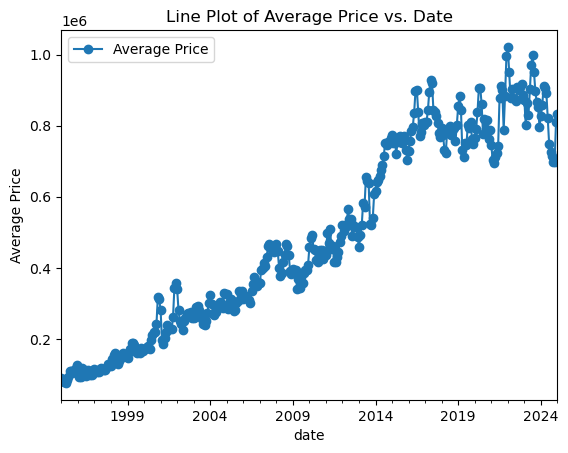

In [203]:
filtered_borough = properties_melted[properties_melted['Borough'].str.contains("City of London", na=False)]
filtered_borough.plot(x='date', y='Average Price', kind='line', marker='o', title='Line Plot of Average Price vs. Date')
plt.xlabel('date')
plt.ylabel('Average Price')
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [206]:
#seperating year from the date column and store it in another column
properties_melted["year"]= properties_melted['date'].dt.year
properties_melted.head()

,Borough,ONC Code,date,Average Price,year
0,City of London,E09000001,1995-01-01,90347.0,1995
1,Barking & Dagenham,E09000002,1995-01-01,51870.0,1995
2,Barnet,E09000003,1995-01-01,98948.0,1995
3,Bexley,E09000004,1995-01-01,64956.0,1995
4,Brent,E09000005,1995-01-01,76880.0,1995


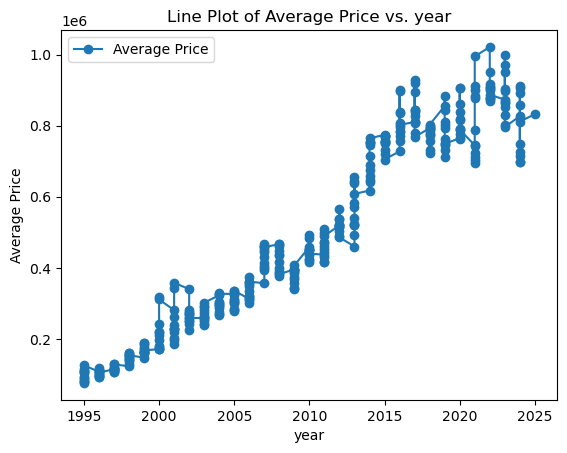

In [208]:
#plot with just a year value without month and day
filtered_borough = properties_melted[properties_melted['Borough'].str.contains("City of London", na=False)]
filtered_borough.plot(x='year', y='Average Price', kind='line', marker='o', title='Line Plot of Average Price vs. year')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.show()

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [211]:
#function to calculate ratio of average price in 2004 and 2024 for each boroughs
def create_price_ratio(name_borough):
    df_borough=properties_melted[properties_melted['Borough']==name_borough]
    df_bor_2004=df_borough[df_borough['date'].dt.year==2004]
    df_bor_2024=df_borough[df_borough['date'].dt.year==2024]
    avg_2004=df_bor_2004['Average Price'].mean()
    avg_2024=df_bor_2024['Average Price'].mean()
    ratio=avg_2024/avg_2004
    return ratio

#each unique borough is added in boroughs_list
boroughs_list=properties_melted['Borough'].unique()

#create an emply dictionary to add ratio for each borough
avg_ratios_2004_2024={}
for borough in boroughs_list:
    avg_ratios_2004_2024[borough]=create_price_ratio(borough)
    
# Find the key with the maximum and minimumn value
min_key = min(avg_ratios_2004_2024, key=avg_ratios_2004_2024.get)
max_key = max(avg_ratios_2004_2024, key=avg_ratios_2004_2024.get)
# Retrieve the maximum value
min_value = avg_ratios_2004_2024[min_key]
max_value = avg_ratios_2004_2024[max_key]
print("least rise in housing price is in",min_key,":",min_value)
print("maximum rise in housing price is in",max_key,":",max_value)

least rise in housing price is in NORTH EAST : 1.5570099599130856
maximum rise in housing price is in Hackney : 2.7025437052385564


In [213]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary avg_ratios_2004_2024. 
df_ratios = pd.DataFrame({key: [value] for key, value in avg_ratios_2004_2024.items()})
print(df_ratios)

   City of London  Barking & Dagenham    Barnet   Bexley     Brent   Bromley  \
0        2.693745            2.094519  2.143511  2.23505  2.233564  2.096867   

     Camden   Croydon    Ealing   Enfield  ...  NORTH EAST  NORTH WEST  \
0  2.401683  1.987172  2.207502  2.131029  ...     1.55701    1.988322   

   YORKS & THE HUMBER  EAST MIDLANDS  WEST MIDLANDS  EAST OF ENGLAND  \
0            1.895598       1.861143       1.850453         1.980621   

     LONDON  SOUTH EAST  SOUTH WEST   England  
0  2.266178    1.945348     1.83818  1.977109  

[1 rows x 45 columns]


In [104]:
# All we need to do now is transpose it, and reset the index! 
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,City of London,2.693745
1,Barking & Dagenham,2.094519
2,Barnet,2.143511
3,Bexley,2.235050
4,Brent,2.233564


In [110]:
# Let's just rename the 'index' column as 'London_Borough', and the '0' column to '2018'.
df_ratios.rename(columns={'index':'Borough', '2024/2004':'avg ratio(2024:2004)'}, inplace=True)
df_ratios.head()

,Borough,avg ratio(2024:2004)
0,City of London,2.693745
1,Barking & Dagenham,2.094519
2,Barnet,2.143511
3,Bexley,2.235050
4,Brent,2.233564


In [112]:
# Let's sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios. 
top15 = df_ratios.sort_values(by='avg ratio(2024:2004)',ascending=False).head(15)
print(top15)

                 Borough  avg ratio(2024:2004)
11               Hackney              2.702544
0         City of London              2.693745
32           Westminster              2.607167
30        Waltham Forest              2.563755
19  Kensington & Chelsea              2.430377
18             Islington              2.427624
22              Lewisham              2.427237
13              Haringey              2.420554
10             Greenwich              2.402282
6                 Camden              2.401683
33          Inner London              2.397135
21               Lambeth              2.376345
23                Merton              2.374048
26  Richmond upon Thames              2.316329
31            Wandsworth              2.315277


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'City of London'),
 Text(2, 0, 'Westminster'),
 Text(3, 0, 'Waltham Forest'),
 Text(4, 0, 'Kensington & Chelsea'),
 Text(5, 0, 'Islington'),
 Text(6, 0, 'Lewisham'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Greenwich'),
 Text(9, 0, 'Camden'),
 Text(10, 0, 'Inner London'),
 Text(11, 0, 'Lambeth'),
 Text(12, 0, 'Merton'),
 Text(13, 0, 'Richmond upon Thames'),
 Text(14, 0, 'Wandsworth')]

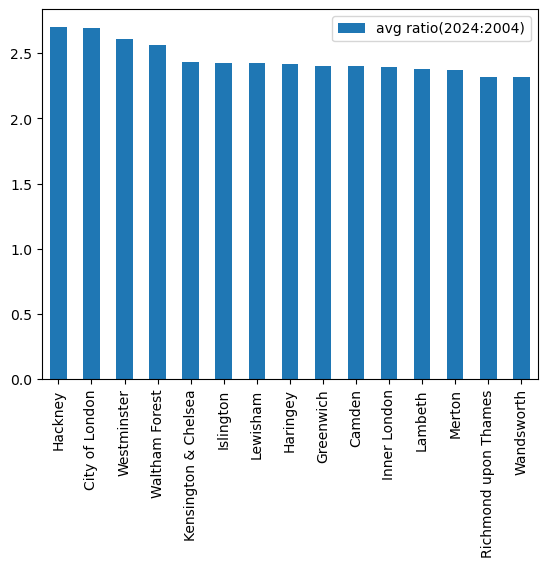

In [116]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2018', then calling plot(), with
# the parameter kind = 'bar'. 
ax = top15[['Borough','avg ratio(2024:2004)']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

**The ratio of average price in 2024 to average price in 2004 was calculated. Hackney has the maximum ratio. That means the price increase for housing is highest for Hackney from 2004 to 2024**

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 